# Artificial Neural Network

An artificial neural network is an interconnected group of nodes, akin to the vast network of neurons in a brain. Here, each circular node represents an artificial neuron and an arrow represents a connection from the output of one artificial neuron to the input of another.
Artificial neural networks (ANN) or connectionist systems are computing systems vaguely inspired by the biological neural networks that constitute animal brains.The neural network itself isn't an algorithm, but rather a framework for many different machine learning algorithms to work together and process complex data inputs.Such systems "learn" to perform tasks by considering examples, generally without being programmed with any task-specific rules. 

An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal from one artificial neuron to another. An artificial neuron that receives a signal can process it and then signal additional artificial neurons connected to it.

In common ANN implementations, the signal at a connection between artificial neurons is a real number, and the output of each artificial neuron is computed by some non-linear function of the sum of its inputs. The connections between artificial neurons are called 'edges'. Artificial neurons and edges typically have a weight that adjusts as learning proceeds. The weight increases or decreases the strength of the signal at a connection. Artificial neurons may have a threshold such that the signal is only sent if the aggregate signal crosses that threshold. Typically, artificial neurons are aggregated into layers. Different layers may perform different kinds of transformations on their inputs. Signals travel from the first layer (the input layer), to the last layer (the output layer), possibly after traversing the layers multiple times.

The original goal of the ANN approach was to solve problems in the same way that a human brain would. However, over time, attention moved to performing specific tasks, leading to deviations from biology. Artificial neural networks have been used on a variety of tasks.

![title](nn.png)

An artificial neural network is an interconnected group of nodes, akin to the vast network of neurons in a brain. Here, each circular node represents an artificial neuron and an arrow represents a connection from the output of one artificial neuron to the input of another.

## Part 1: Data exploration
### Understand raw data

In [136]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import sklearn
%matplotlib inline

In [137]:
pd.set_option('display.max_columns', None)# display all the columns
raw_data = pd.read_csv('a_20s_1600_Het_h_0.4MAF_0.2_r_50_EDM-2_01.txt', sep = "\t")# read in dataset

In [138]:
raw_data.head()

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,M0P0,M1P0,M2P0,M3P0,Class
0,0,0,1,1,0,0,2,0,0,2,2,0,0,1,2,0,1,1,1,1,1
1,0,2,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,1,1,1,1
2,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,1,0,1,1
3,0,2,0,1,0,0,0,0,0,1,1,0,0,2,0,0,1,1,1,1,1
4,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,0,1


In [139]:
print ("Number of rows: " + str(raw_data.shape[0])) # row count
print ("Number of columns: " + str(raw_data.shape[1])) # column count

Number of rows: 1600
Number of columns: 21


In [140]:
raw_data.describe() # descriptive statistics 

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,M0P0,M1P0,M2P0,M3P0,Class
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000
mean,0.081250,0.719375,0.379375,0.806250,0.072500,0.837500,0.488125,0.653125,0.354375,1.007500,0.515000,0.080625,0.258750,0.83875,0.900000,0.403750,0.530000,0.53000,0.518750,0.516250,0.500000
std,0.275583,0.675211,0.560710,0.691202,0.264173,0.703671,0.611427,0.668455,0.541042,0.715202,0.630495,0.285790,0.477693,0.71191,0.687601,0.569815,0.579275,0.60152,0.581902,0.572224,0.500156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.500000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000


In [141]:
raw_data.isnull().values.any() # check missing data

False

### Understand the features

Text(0,0.5,'Count')

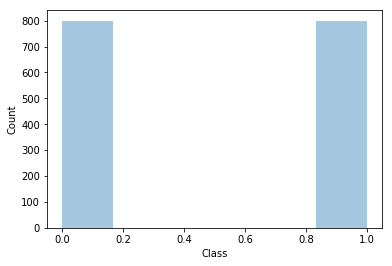

In [142]:
sb.distplot(raw_data['Class'],kde=False) # The outcome is labeled as 'class'
plt.ylabel("Count")

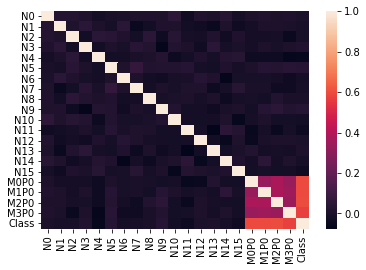

In [143]:
# Use heat map to visualize correlation between each column
corr = raw_data[['N0','N1','N2','N3','N4','N5','N6','N7','N8','N9','N10','N11','N12','N13','N14','N15','M0P0','M1P0','M2P0','M3P0','Class']].corr()
sb.heatmap(corr)

In [144]:
# From heat map, we noticed that N0P0, M1P0, M2P0 and M3P0 are correlated with 'Class'. 

In [145]:
corr

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,M0P0,M1P0,M2P0,M3P0,Class
N0,1.000000,0.028505,0.027041,0.017031,-0.012241,0.000403,0.002018,0.010503,0.016489,0.009598,0.054169,-0.027643,0.020725,0.006256,0.036304,-0.009907,0.008227,0.019241,0.006094,0.015417,0.004537
N1,0.028505,1.000000,0.010472,0.045569,0.008949,-0.009164,0.044185,-0.043989,-0.022059,0.017311,0.010628,-0.022036,-0.026798,-0.042155,0.009564,-0.032048,-0.014438,0.007653,0.007829,0.004526,-0.004630
N2,0.027041,0.010472,1.000000,-0.023226,0.046411,0.039052,0.014061,-0.019100,0.051320,-0.035171,0.036079,-0.007569,-0.014152,0.020177,-0.026440,0.017467,-0.014845,-0.014296,-0.007439,-0.041641,-0.005575
N3,0.017031,0.045569,-0.023226,1.000000,-0.022348,0.005947,-0.005448,0.042595,0.024844,-0.062843,0.025329,0.009478,-0.028009,0.047040,-0.010527,0.003434,-0.012027,0.009476,-0.004956,0.007965,0.018090
N4,-0.012241,0.008949,0.046411,-0.022348,1.000000,-0.017326,-0.014026,0.000841,0.008281,0.030221,-0.040326,-0.019487,0.014793,-0.010957,0.029609,0.038077,-0.034656,-0.033374,-0.033258,-0.061581,-0.056799
N5,0.000403,-0.009164,0.039052,0.005947,-0.017326,1.000000,0.011501,0.070218,0.019938,0.022306,0.023822,0.030982,-0.008791,-0.016136,0.014218,-0.010957,0.005830,0.032210,0.030356,0.039178,0.031985
N6,0.002018,0.044185,0.014061,-0.005448,-0.014026,0.011501,1.000000,0.009042,-0.020355,-0.024109,-0.006838,0.000114,0.031939,0.014276,-0.062328,-0.005975,-0.005174,-0.004982,-0.012557,-0.028942,-0.015338
N7,0.010503,-0.043989,-0.019100,0.042595,0.000841,0.070218,0.009042,1.000000,-0.012661,0.005445,-0.004711,0.012266,0.012939,-0.040074,-0.007484,0.037897,0.000242,0.000233,-0.033914,-0.031852,-0.010288
N8,0.016489,-0.022059,0.051320,0.024844,0.008281,0.019938,-0.020355,-0.012661,1.000000,-0.006873,0.003657,0.009244,-0.011400,0.007191,-0.039169,-0.009993,-0.007004,-0.016353,0.025563,0.000578,0.001156
N9,0.009598,0.017311,-0.035171,-0.062843,0.030221,0.022306,-0.024109,0.005445,-0.006873,1.000000,0.024714,-0.018259,-0.014836,-0.030787,-0.002289,0.006376,-0.018658,0.032912,0.049251,0.022624,0.033218


In [198]:
y = raw_data.iloc[:, -1].values
X = raw_data.iloc[:, :-1].values

## Part 2: Training a Neural Network

Let's build a 2-layer neural network with one input layer, one hidden layer, and one output layer (note that the input layer is typically excluded when counting the number of layers in a Neural Network). <br><br>
The number of nodes in the input layer is equal to the number of features (columns) in my data, 20. <br>
The number of nodes in the output layer is determined by the number of classes we have, 2. <br>
As for the number of nodes in the hidden layer, we can choose by ourselves. For most problems, one could probably get decent performance (even without a second optimization step) by setting the hidden layer configuration using just two rules: (i) number of hidden layers equals one; and (ii) the number of neurons in that layer is the mean of the neurons in the input and output layers. Thus, this time, I will set the number of nodes in the hidden layer to be 11.

We also need an activation function for our hidden layer. The activation function of a node defines the output of that node given an input or set of inputs.A nonlinear activation function is what allows us to fit nonlinear hypotheses. Common chocies for activation functions are tanh, the sigmoid function and ReLUs. 

![title](tanh.png)

![title](sigmoid.png)

![title](relu.png)

We will use tanh in this notebook. It is a rescaling of the logistic sigmoid such that it squashes a number to the range [-1, 1] and its output is zero-centered.

For the output layer, the activation function will be the softmax function which represents a categorical distribution – that is, a probability distribution over K different possible outcomes. 

![title](2l.png)

Naturally, the right values for the weights and biases determines the strength of the predictions. The process of fine-tuning the weights and biases from the input data is known as training the Neural Network.


Each iteration of the training process consists of the following steps:<br>
Calculating the predicted output ŷ, known as feedforward<br>
Updating the weights and biases, known as backpropagation


![title](process.png)

The output ŷ of a simple 2-layer Neural Network is:<br>
\begin{aligned}
z_1 & = xW_1 + b_1 \\
a_1 & = \tanh(z_1) \\
z_2 & = a_1W_2 + b_2 \\
a_2 & = \hat{y} = \mathrm{softmax}(z_2)
\end{aligned}


 The weights W and the biases b are the only variables that affects the output ŷ.<br>
 W1,b1,W2,b2 are parameters of our network that we need to learn from our training data.Our goal is to find parameters (W1,b1,W2,b2) that minimize the error on our training data. We call the function that measures our error the loss function. A common choice with the softmax output is the cross-entropy loss. If we have N training examples and C classes, then the loss for our prediction ŷ with respect to the true labels  y
  is given by:<br>
 
\begin{aligned}
L(y,\hat{y}) = - \frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n,i} \log\hat{y}_{n,i}
\end{aligned}
 


Our goal in training is to find the best set of parameters that minimizes the loss function.Now that we’ve measured the loss, we want to propagation the error back and to update our weights and biases. To do these, We need to know the derivative of the loss function with respect to the weights and biases. 

![title](gd.png)

We can update weights and biases by increasing/reducing with the derivative(refer to the diagram above) . This is known as gradient descent.

We will use backpropagation algorithm to calculate the gradients starting from the output. 

We have the following backpropagation formula:

$$
\begin{aligned}
& \delta_3 = \hat{y} - y \\
& \delta_2 = (1 - \tanh^2z_1) \circ \delta_3W_2^T \\
& \frac{\partial{L}}{\partial{W_2}} = a_1^T \delta_3  \\
& \frac{\partial{L}}{\partial{b_2}} = \delta_3\\
& \frac{\partial{L}}{\partial{W_1}} = x^T \delta_2\\
& \frac{\partial{L}}{\partial{b_1}} = \delta_2 \\
\end{aligned}
$$

### Implementation

In [147]:
# neural network structure
num_input_layer = 20 # number of nodes in input layer
num_output_layer = 2 # number of nodes in output layer
num_hidden_layer = 11 # number of nodes in hidden layer


In [148]:
# Gradient descent parameters 
learning_rate = 0.001
regularization_lambda = 0.01

In [149]:
# This function predicts output(0 or 1).It calculate the output of the neural network and return the class with highest probability. 
def predict(m, x):
    w1, w2, b1, b2 = m['w1'],m['w2'],m['b1'],m['b2']
    
    # feedforward
    z1 = x.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
    return np.argmax(probs, axis=1)# np.argmax returns the indices of the maximum values along an axis.Axis = 1, max in each row; axis = 0, max in each column 

In [199]:
# This functions calculates total loss
def total_loss(m, X = X, y = y):
    w1, w2, b1, b2 = m['w1'],m['w2'],m['b1'],m['b2']
    train_size = len(X)
    
    # feedforward
    z1 = X.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # calculate loss
    loss_sum = np.sum(-np.log(probs[range(train_size), y]))
    loss  = 1.0/train_size * loss_sum
    return loss

In [201]:
# This function returns a neural net work model with learned parameters
# num_n_hidden: number of nodes in hidden layer
# num_iteration: number of passes through the training data for gradient descent
# print_loss: print the loss every 1000 iterations when True
def nn_model( num_n_hidden, num_iteration,learning_rate,  print_loss = False, X = X, y = y):
    # we will return a model with parameters at the end: 
    model = {}
    train_size = len(X)
    
    # initialize parameters 
    np.random.seed(39)
    w1 = np.random.randn(num_input_layer , num_n_hidden) / np.sqrt(num_input_layer )
    b1 = np.zeros((1, num_n_hidden))
    w2 = np.random.randn(num_n_hidden, num_output_layer) / np.sqrt(num_n_hidden)
    b2 = np.zeros((1, num_output_layer))
    
    # gradient descent
    for i in range(0, num_iteration):
        # feedforward
        z1 = X.dot(w1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(w2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # backpropagation
        delta3 = probs
        delta3[range(train_size), y] -= 1
        dw2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(w2.T) * (1 - np.power(a1, 2))
        dw1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dw2 += regularization_lambda * w2
        dw1 += regularization_lambda * w1
        # Gradient descent parameter update
        w1 += -learning_rate * dw1
        b1 += -learning_rate * db1
        w2 += -learning_rate * dw2
        b2 += -learning_rate * db2
        
        model = {'w1':w1, 'w2':w2, 'b1':b1, 'b2':b2}
        
        #print loss
        if print_loss and i % 1000 == 0:
            print('Loss after %i iteration:%f' %(i,total_loss(model,X = X, y = y)))
   

    return model

### K-fold Cross-Validation

In [152]:
from sklearn.cross_validation import KFold

In [153]:
# This function does 10-fold. It saves the result at each time as different parts of y_pred. 
# In the end, it returns the y_pred as the result of all the 10-fold.
def run_cv(X,y, num_hidden_layer,num_iteration,learning_rate):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=10,shuffle=True) # Total number of elements；Number of folds， default=3；Whether to shuffle the data before splitting into batches
    y_pred = y.copy()
     
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        m = nn_model(num_hidden_layer,num_iteration, learning_rate,print_loss = False,X = X_train, y = y_train)
        y_pred[test_index] = predict(m, X_test)
         
    return y_pred

### Train a neural network with a hidden layer size of 11

In [154]:
# with learning_rate = 0.001
model = nn_model(num_hidden_layer,20000, learning_rate,print_loss = True)

Loss after 0 iteration:0.554981
Loss after 1000 iteration:0.072043
Loss after 2000 iteration:0.032190
Loss after 3000 iteration:0.026320
Loss after 4000 iteration:0.016058
Loss after 5000 iteration:0.011195
Loss after 6000 iteration:0.008339
Loss after 7000 iteration:0.006668
Loss after 8000 iteration:0.005636
Loss after 9000 iteration:0.004271
Loss after 10000 iteration:0.003611
Loss after 11000 iteration:0.003128
Loss after 12000 iteration:0.002779
Loss after 13000 iteration:0.002510
Loss after 14000 iteration:0.002288
Loss after 15000 iteration:0.002097
Loss after 16000 iteration:0.001931
Loss after 17000 iteration:0.001791
Loss after 18000 iteration:0.001675
Loss after 19000 iteration:0.001578


In [155]:
res = run_cv(X,y,num_hidden_layer,20000, learning_rate)

In [156]:
# This function calculates accuracy
def accuracy(y_true,y_pred):
    return np.mean(y_true == y_pred) # NumPy interpretes True and False as 1. and 0.

In [202]:
print('Neural network accuracy: ' + str(accuracy(y, res)))

Neural network accuracy: 0.89875


### Change number of iterations

We have run 20000 iterations in the previous example. We want to change iteration number and to see how it affects result. 

Run 2000 iterations

In [158]:
# with learning_rate = 0.001
model_i_2000 = nn_model(num_hidden_layer,2000, learning_rate,print_loss = True)


Loss after 0 iteration:0.554981
Loss after 1000 iteration:0.072043


In [159]:
res_i_2000 = run_cv(X,y,num_hidden_layer,2000, learning_rate)

In [203]:
print('Neural network accuracy: ' + str(accuracy(y, res_i_2000)))

Neural network accuracy: 0.906875


Run 5000 iterations

In [161]:
# with learning_rate = 0.001
model_i_5000 = nn_model(num_hidden_layer,5000, learning_rate,print_loss = True)

Loss after 0 iteration:0.554981
Loss after 1000 iteration:0.072043
Loss after 2000 iteration:0.032190
Loss after 3000 iteration:0.026320
Loss after 4000 iteration:0.016058


In [162]:
res_i_5000 = run_cv(X,y,num_hidden_layer,5000, learning_rate)

In [204]:
print('Neural network accuracy: ' + str(accuracy(y, res_i_5000)))

Neural network accuracy: 0.899375


Run 10000 iterations

In [164]:
# with learning_rate = 0.001
model_i_10000 = nn_model(num_hidden_layer,10000, learning_rate,print_loss = True)

Loss after 0 iteration:0.554981
Loss after 1000 iteration:0.072043
Loss after 2000 iteration:0.032190
Loss after 3000 iteration:0.026320
Loss after 4000 iteration:0.016058
Loss after 5000 iteration:0.011195
Loss after 6000 iteration:0.008339
Loss after 7000 iteration:0.006668
Loss after 8000 iteration:0.005636
Loss after 9000 iteration:0.004271


In [165]:
res_i_10000 = run_cv(X,y,num_hidden_layer,10000, learning_rate)

In [205]:
print('Neural network accuracy: ' + str(accuracy(y, res_i_10000)))

Neural network accuracy: 0.896875


From above, we can see that large iteration numbers do not lead to high accuracy probably due to overfitting.

### Change learning rate

We used learning rate 0.001 for the previous examples. We will change it and see how it affects result.

Set learning rate to be 0.01

In [167]:
model_lr_01 = nn_model(num_hidden_layer,20000, 0.01,print_loss = True)

Loss after 0 iteration:2.029559
Loss after 1000 iteration:85.907363
Loss after 2000 iteration:82.080926
Loss after 3000 iteration:5.449913
Loss after 4000 iteration:8.598803
Loss after 5000 iteration:7.837303
Loss after 6000 iteration:10.955712
Loss after 7000 iteration:4.772520
Loss after 8000 iteration:9.626135
Loss after 9000 iteration:3.823448
Loss after 10000 iteration:2.757594
Loss after 11000 iteration:8.092454
Loss after 12000 iteration:3.321667
Loss after 13000 iteration:6.381027
Loss after 14000 iteration:5.121073
Loss after 15000 iteration:3.347808
Loss after 16000 iteration:0.781658
Loss after 17000 iteration:7.170488
Loss after 18000 iteration:4.617957
Loss after 19000 iteration:38.649404


In [168]:
res_lr_01 = run_cv(X,y,num_hidden_layer,20000, 0.01)

In [206]:
print('Neural network accuracy: ' + str(accuracy(y, res_lr_01)))

Neural network accuracy: 0.77375


Set learning rate to be 0.005

In [170]:
model_lr_005 = nn_model(num_hidden_layer,20000, 0.005,print_loss = True)

Loss after 0 iteration:0.690073
Loss after 1000 iteration:4.759541
Loss after 2000 iteration:0.892556
Loss after 3000 iteration:0.480978
Loss after 4000 iteration:1.079858
Loss after 5000 iteration:1.621521
Loss after 6000 iteration:0.750379
Loss after 7000 iteration:1.166582
Loss after 8000 iteration:1.251452
Loss after 9000 iteration:1.042488
Loss after 10000 iteration:1.030003
Loss after 11000 iteration:1.159303
Loss after 12000 iteration:2.470673
Loss after 13000 iteration:0.580804
Loss after 14000 iteration:0.999351
Loss after 15000 iteration:0.619001
Loss after 16000 iteration:13.594964
Loss after 17000 iteration:0.872865
Loss after 18000 iteration:3.440464
Loss after 19000 iteration:8.103656


In [171]:
res_lr_005 = run_cv(X,y, num_hidden_layer,20000, 0.005)

In [207]:
print('Neural network accuracy: ' + str(accuracy(y, res_lr_005)))

Neural network accuracy: 0.890625


Set learning rate to be 0.0001

In [173]:
model_lr_0001 = nn_model(num_hidden_layer,20000, 0.0001,print_loss = True)

Loss after 0 iteration:0.720266
Loss after 1000 iteration:0.161367
Loss after 2000 iteration:0.117620
Loss after 3000 iteration:0.098035
Loss after 4000 iteration:0.087000
Loss after 5000 iteration:0.078478
Loss after 6000 iteration:0.070033
Loss after 7000 iteration:0.061677
Loss after 8000 iteration:0.054112
Loss after 9000 iteration:0.047605
Loss after 10000 iteration:0.042019
Loss after 11000 iteration:0.037301
Loss after 12000 iteration:0.033397
Loss after 13000 iteration:0.030184
Loss after 14000 iteration:0.027514
Loss after 15000 iteration:0.025248
Loss after 16000 iteration:0.023274
Loss after 17000 iteration:0.021536
Loss after 18000 iteration:0.020000
Loss after 19000 iteration:0.018638


In [174]:
res_lr_0001 = run_cv(X,y,num_hidden_layer,20000, 0.0001)

In [208]:
print('Neural network accuracy: ' + str(accuracy(y, res_lr_0001)))

Neural network accuracy: 0.896875


 With a high learning rate we can cover more ground each step, but we risk overshooting the lowest point since the slope of the hill is constantly changing. With a very low learning rate, we can confidently move in the direction of the negative gradient since we are recalculating it so frequently. A low learning rate is more precise, but calculating the gradient is time-consuming, so it will take us a very long time to get to the bottom.
 
 We can try several values and find the one with best performance.

### Change hidden layer size

We have the hidden layer size of 11 for previous examples. Now we want to pick different hidden layer sizes and to see how does hidden layer size affects results. 

Set hidden layer size to be 1, 5, 10, 15 respectively.

In [176]:
hidden_layer = [1, 5, 10, 15]

In [177]:
for layer_size in hidden_layer:
     
    res_hl = run_cv(X_v,y_v,layer_size,20000, 0.001)
    
    print('Neural network accuracy with hidden layer size ' + str(layer_size) + ' is: ' + str(accuracy(y, res_hl)))
    print('\n')

Neural network accuracy with hidden layer size 1 is: 0.8975


Neural network accuracy with hidden layer size 5 is: 0.896875


Neural network accuracy with hidden layer size 10 is: 0.89125


Neural network accuracy with hidden layer size 15 is: 0.898125




References: <br>
https://en.wikipedia.org/wiki/Artificial_neural_network<br>
https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw<br>
https://en.wikipedia.org/wiki/Activation_function<br>
https://en.wikipedia.org/wiki/Softmax_function<br>
https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6<br>
https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression<br>
http://blog.datumbox.com/tuning-the-learning-rate-in-gradient-descent/<br>
http://theory.stanford.edu/~tim/s16/l/l6.pdf<br>
https://towardsdatascience.com/random-initialization-for-neural-networks-a-thing-of-the-past-bfcdd806bf9e<br>
http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
